- 이용한 데이터 : IRIS
- 알고리즘 : Decision Tree

### EDA

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
iris=load_iris()
iris.data[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['species']=iris.target
iris_df.tail(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


boxplot 그리기

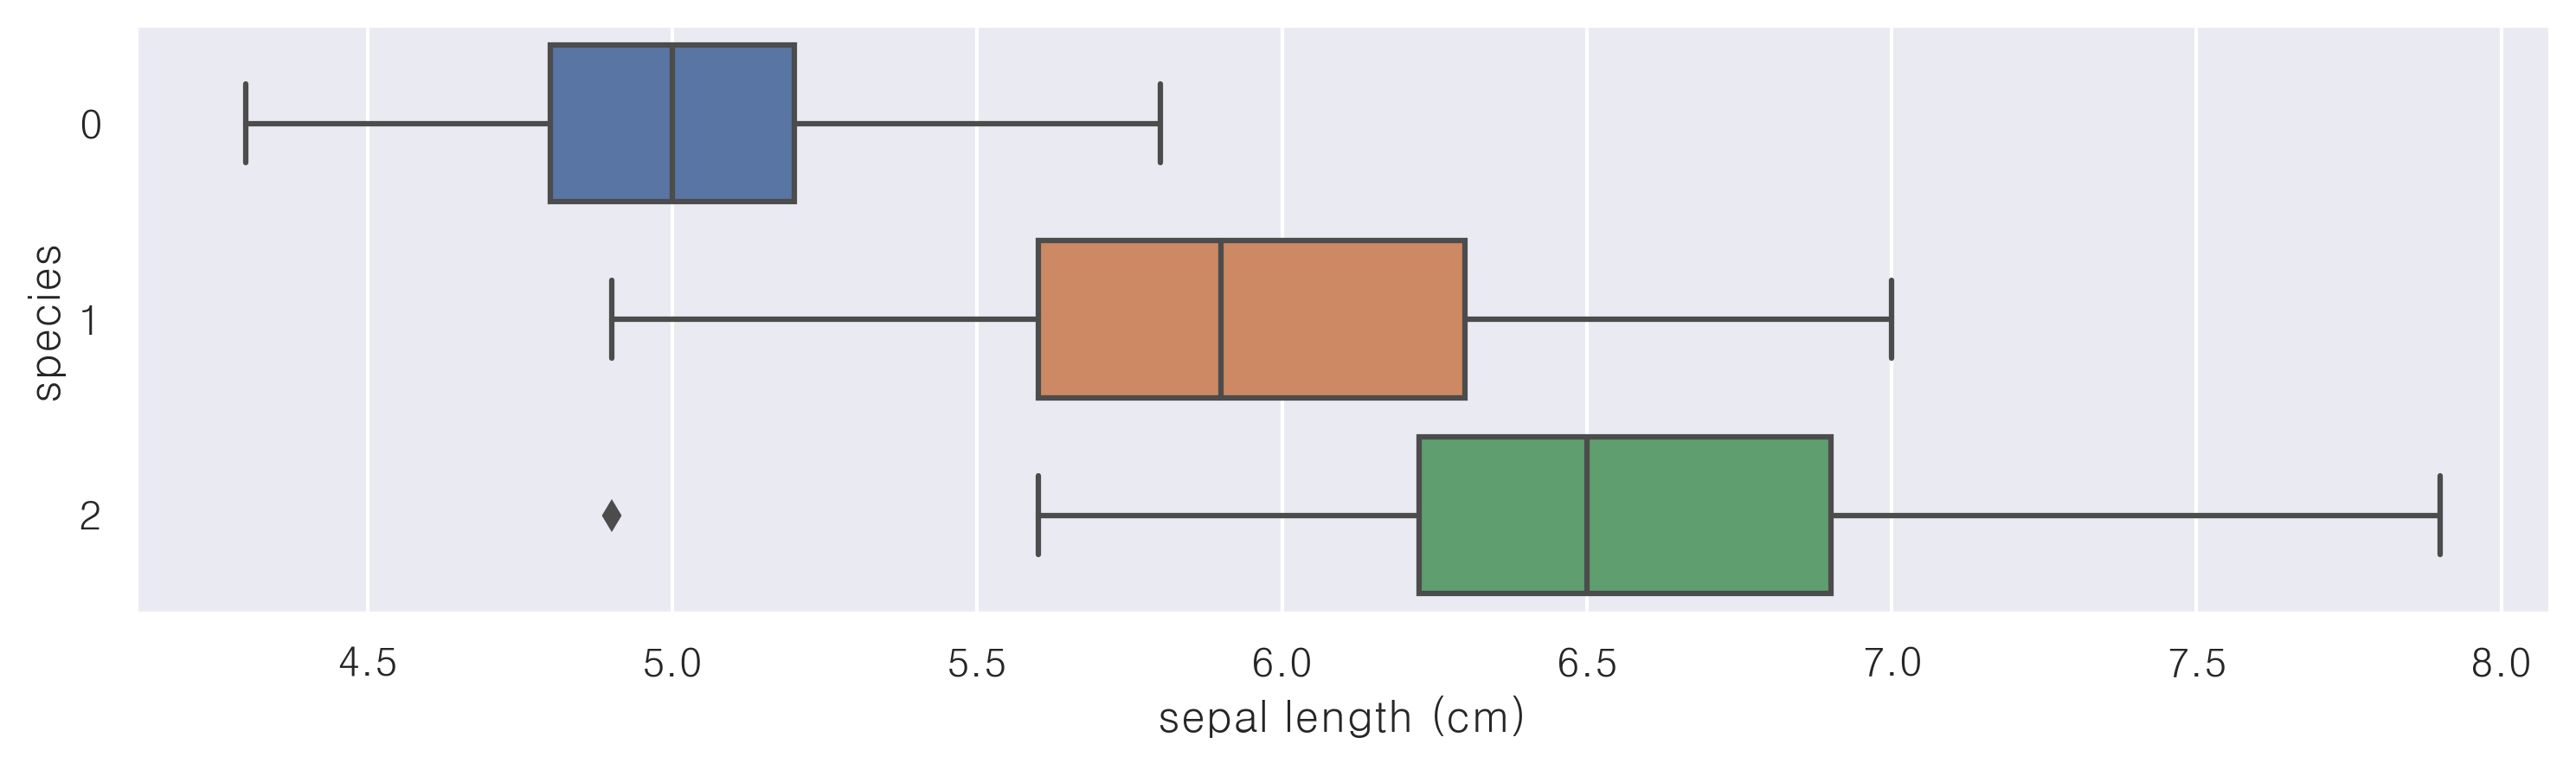

In [6]:
#sepal length
plt.figure(figsize=(12,3))
sns.boxplot(x='sepal length (cm)',y='species',data=iris_df, orient='h')

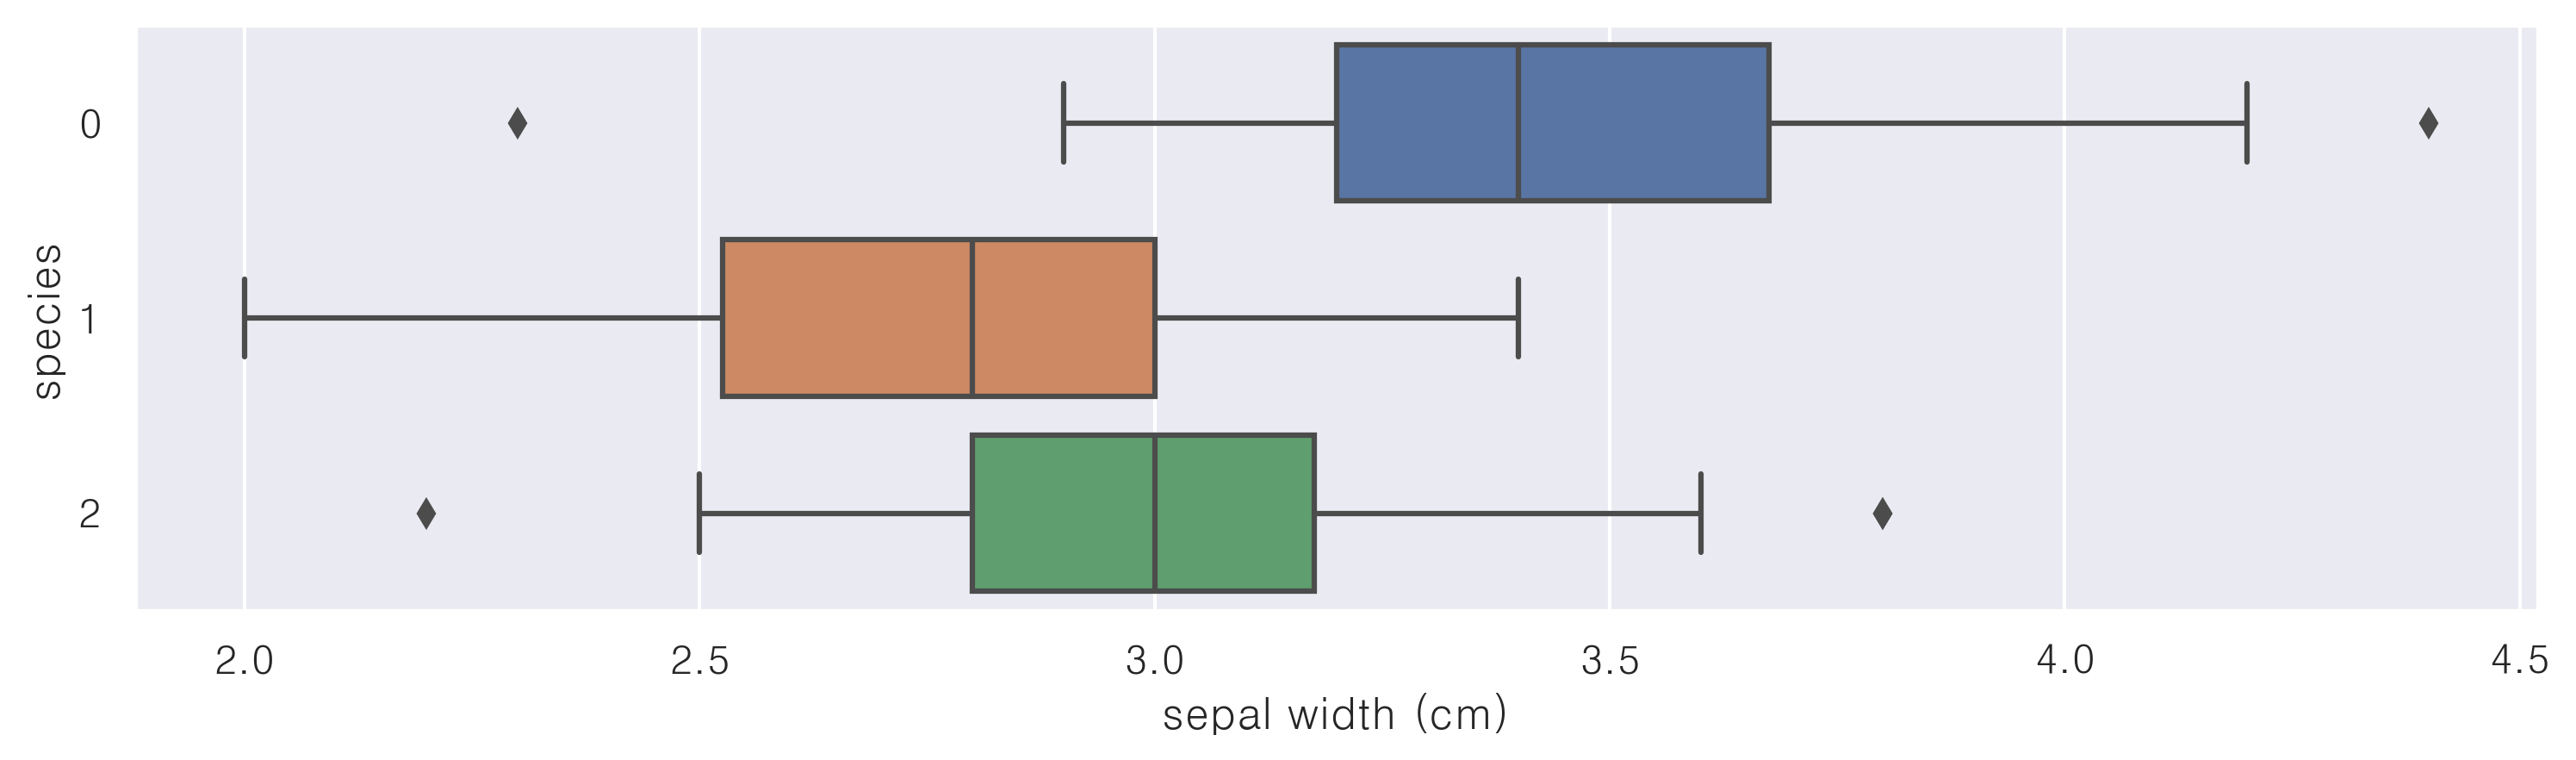

In [7]:
#sepal width
plt.figure(figsize=(12,3))
sns.boxplot(x='sepal width (cm)',y='species',data=iris_df, orient='h')

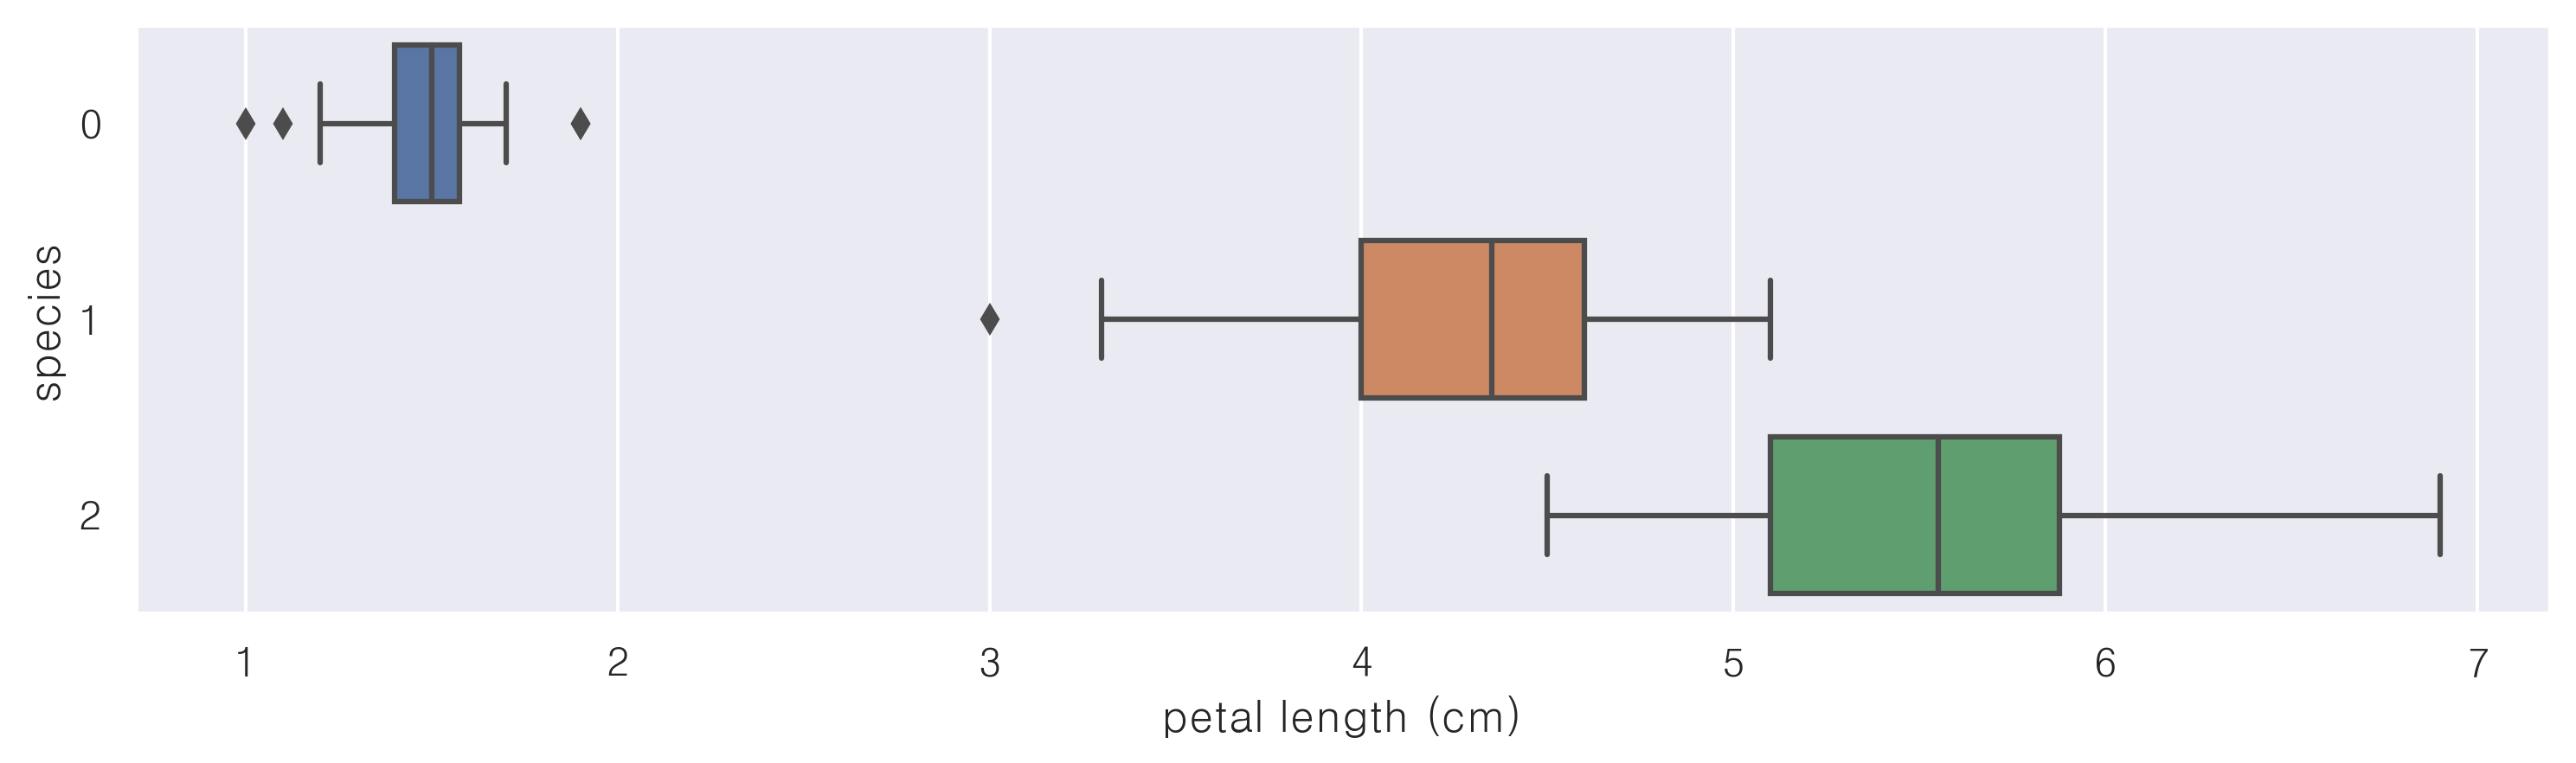

In [8]:
#petal length
plt.figure(figsize=(12,3))
sns.boxplot(x='petal length (cm)',y='species',data=iris_df, orient='h')

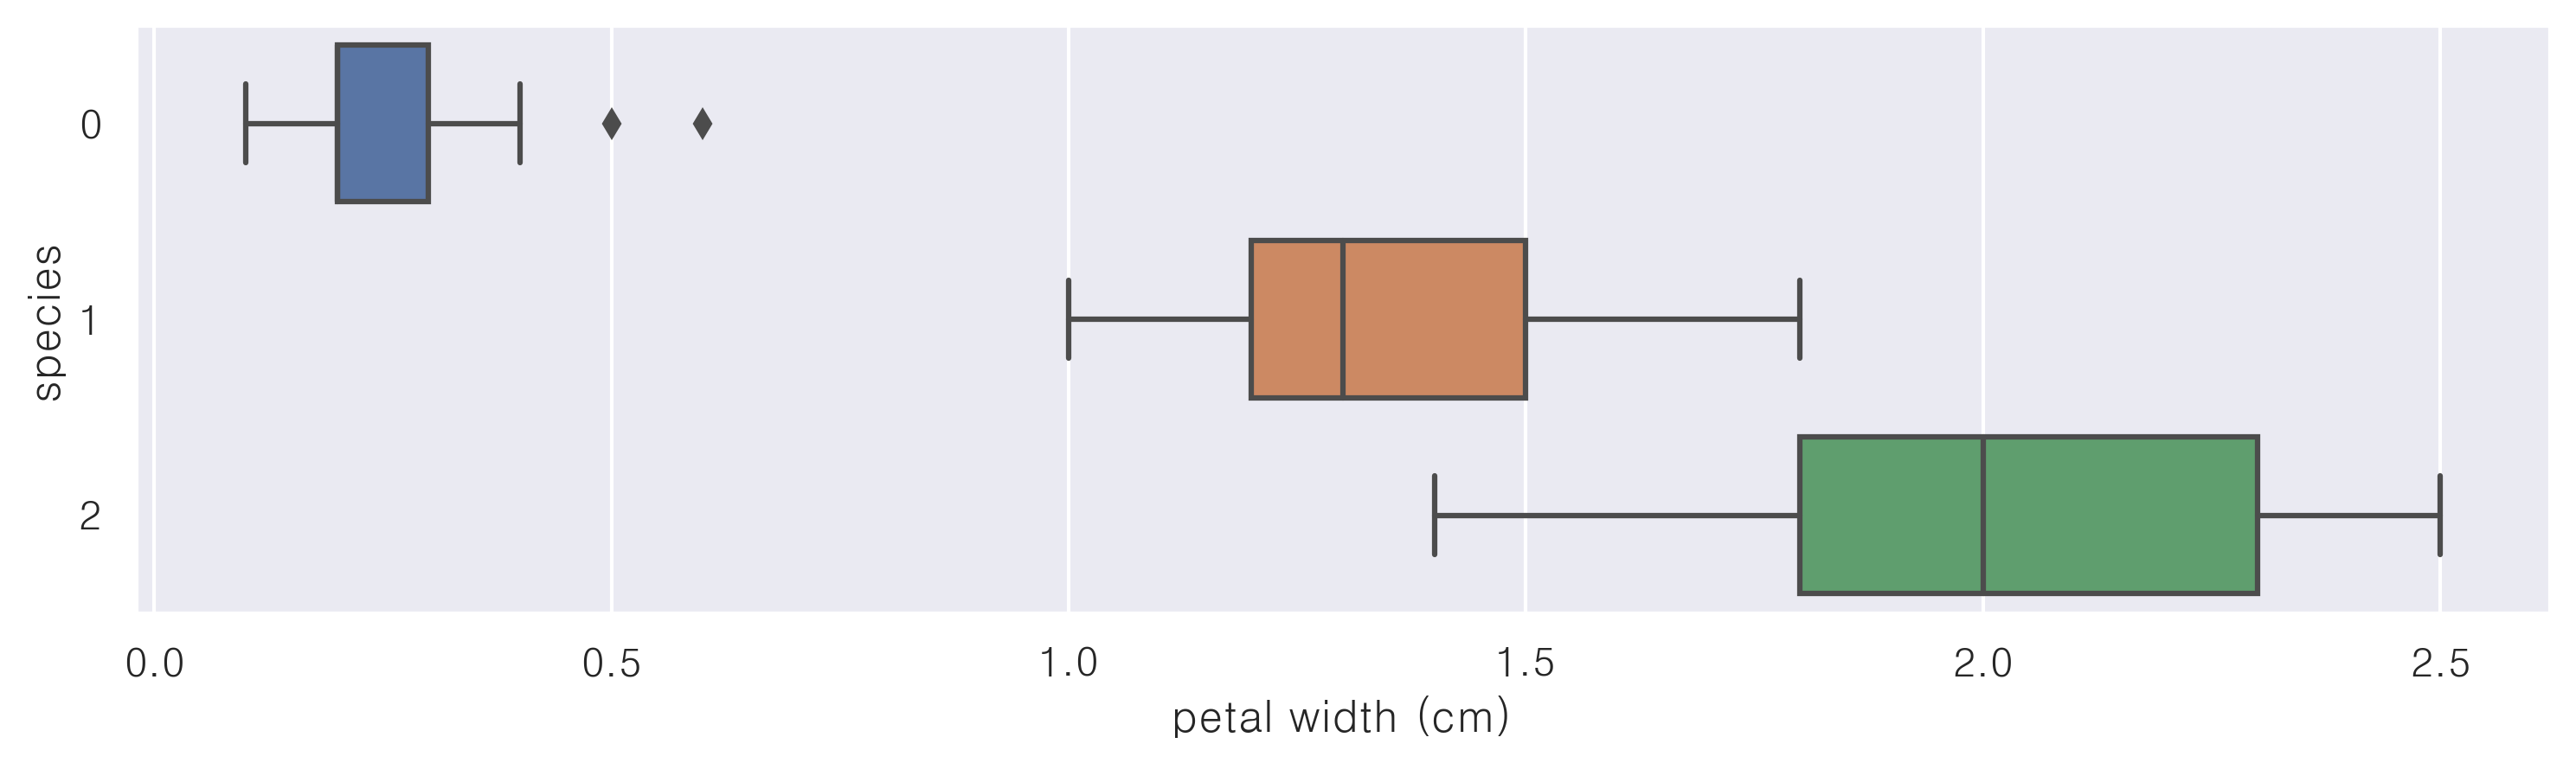

In [9]:
#petal width
plt.figure(figsize=(12,3))
sns.boxplot(x='petal width (cm)',y='species',data=iris_df, orient='h')

pairplot

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


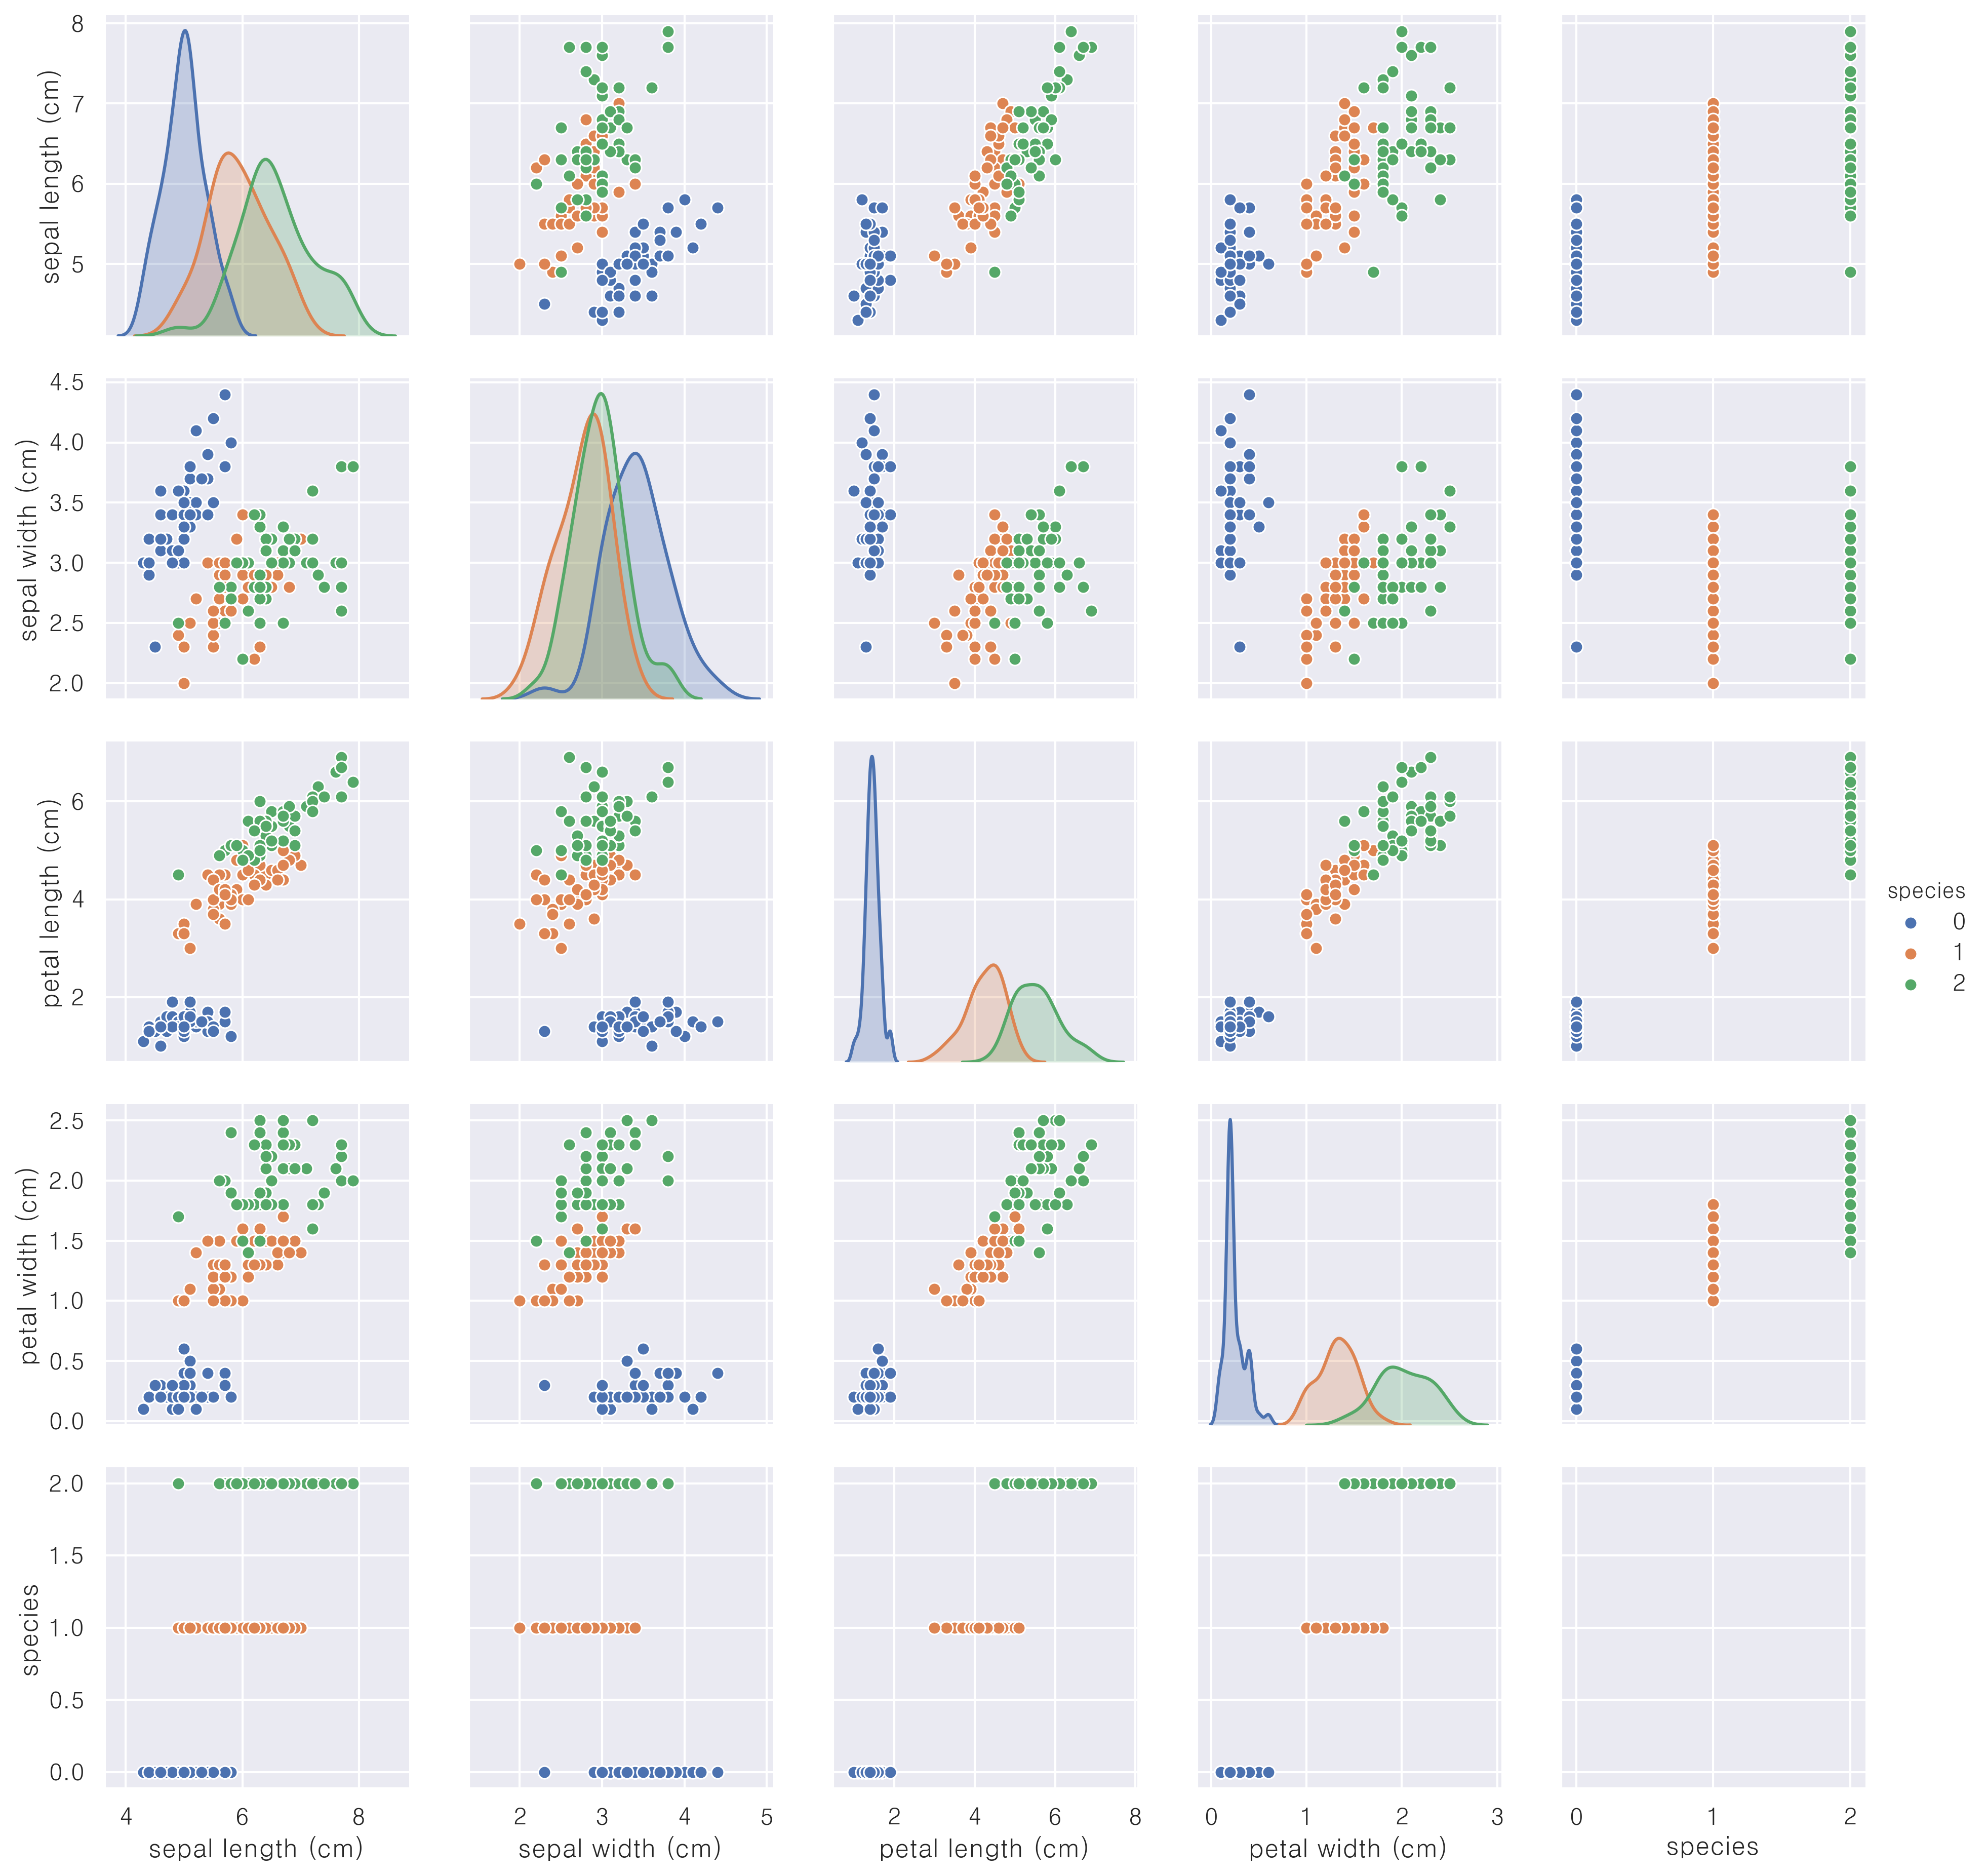

In [10]:
sns.pairplot(iris_df,hue='species')

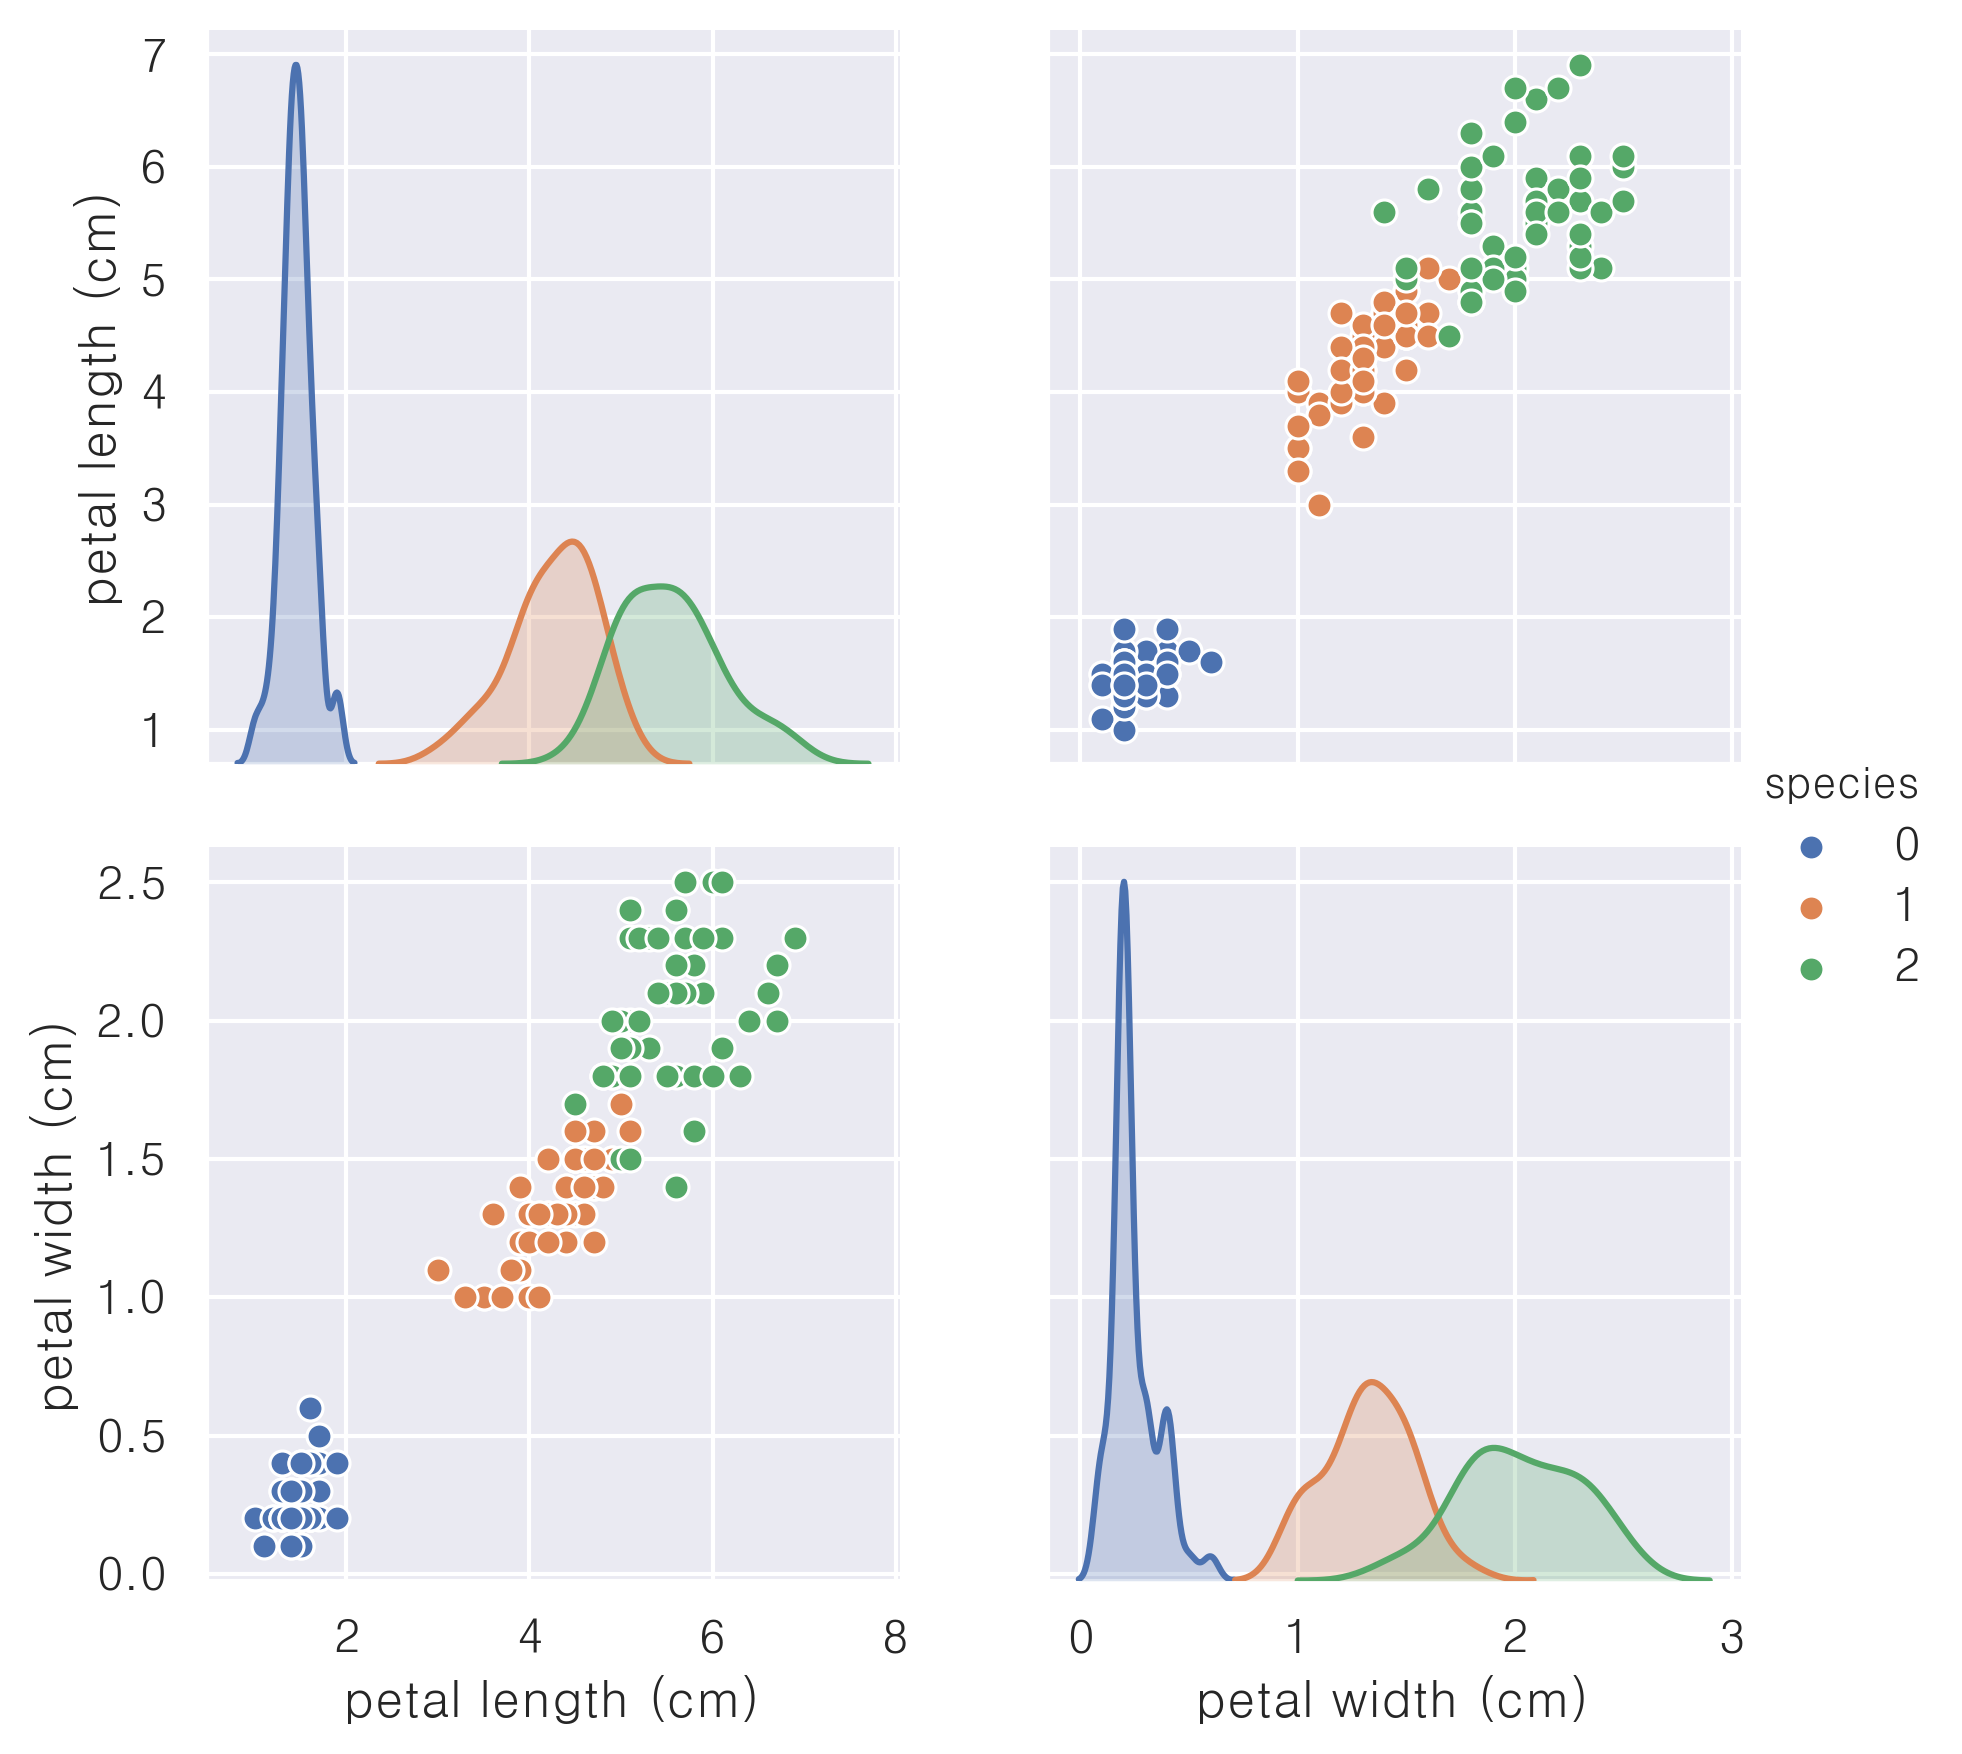

In [11]:
sns.pairplot(data=iris_df, vars=['petal length (cm)','petal width (cm)'], hue='species', height=3)

setosa의 경우, 대략 petal length< 2.5 이다.
versicolor의 경우, 대략 petal width< 1.8? 이다. 
보다 정확하게 그 경계를 알기 위해 decision tree를 사용한다.

In [12]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


decision tree 생성
- petal의 length와 width로만 분류한다.

### Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
iris_tree=DecisionTreeClassifier()
iris_tree.fit(iris.data[:,2:],iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
#예측
pred=iris_tree.predict(iris.data[:,2:])

In [17]:
#accuracy 확인
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(pred,iris.target)

0.9933333333333333

graphviz,plot_decision_regions 그리기

In [19]:
from graphviz import Source
from sklearn.tree import export_graphviz

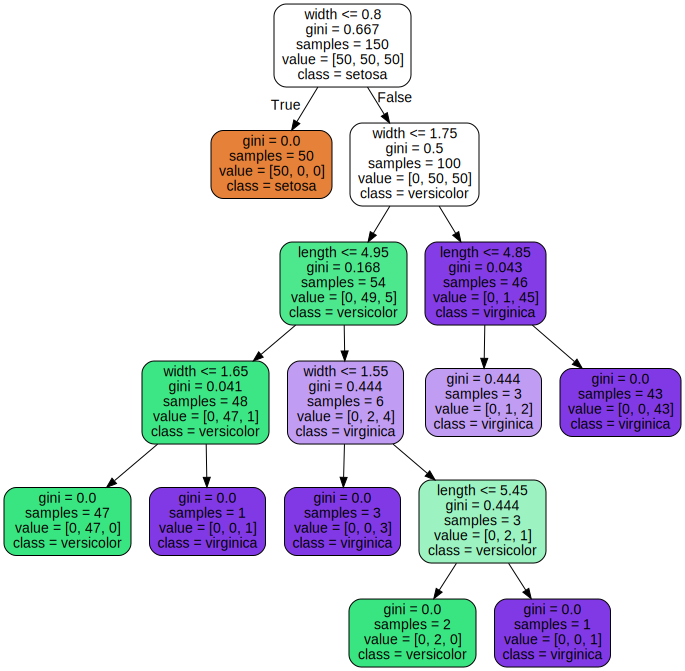

In [20]:
Source(export_graphviz(iris_tree, class_names=iris.target_names, feature_names=['length','width'],rounded=True,filled=True))

In [21]:
from mlxtend.plotting import plot_decision_regions

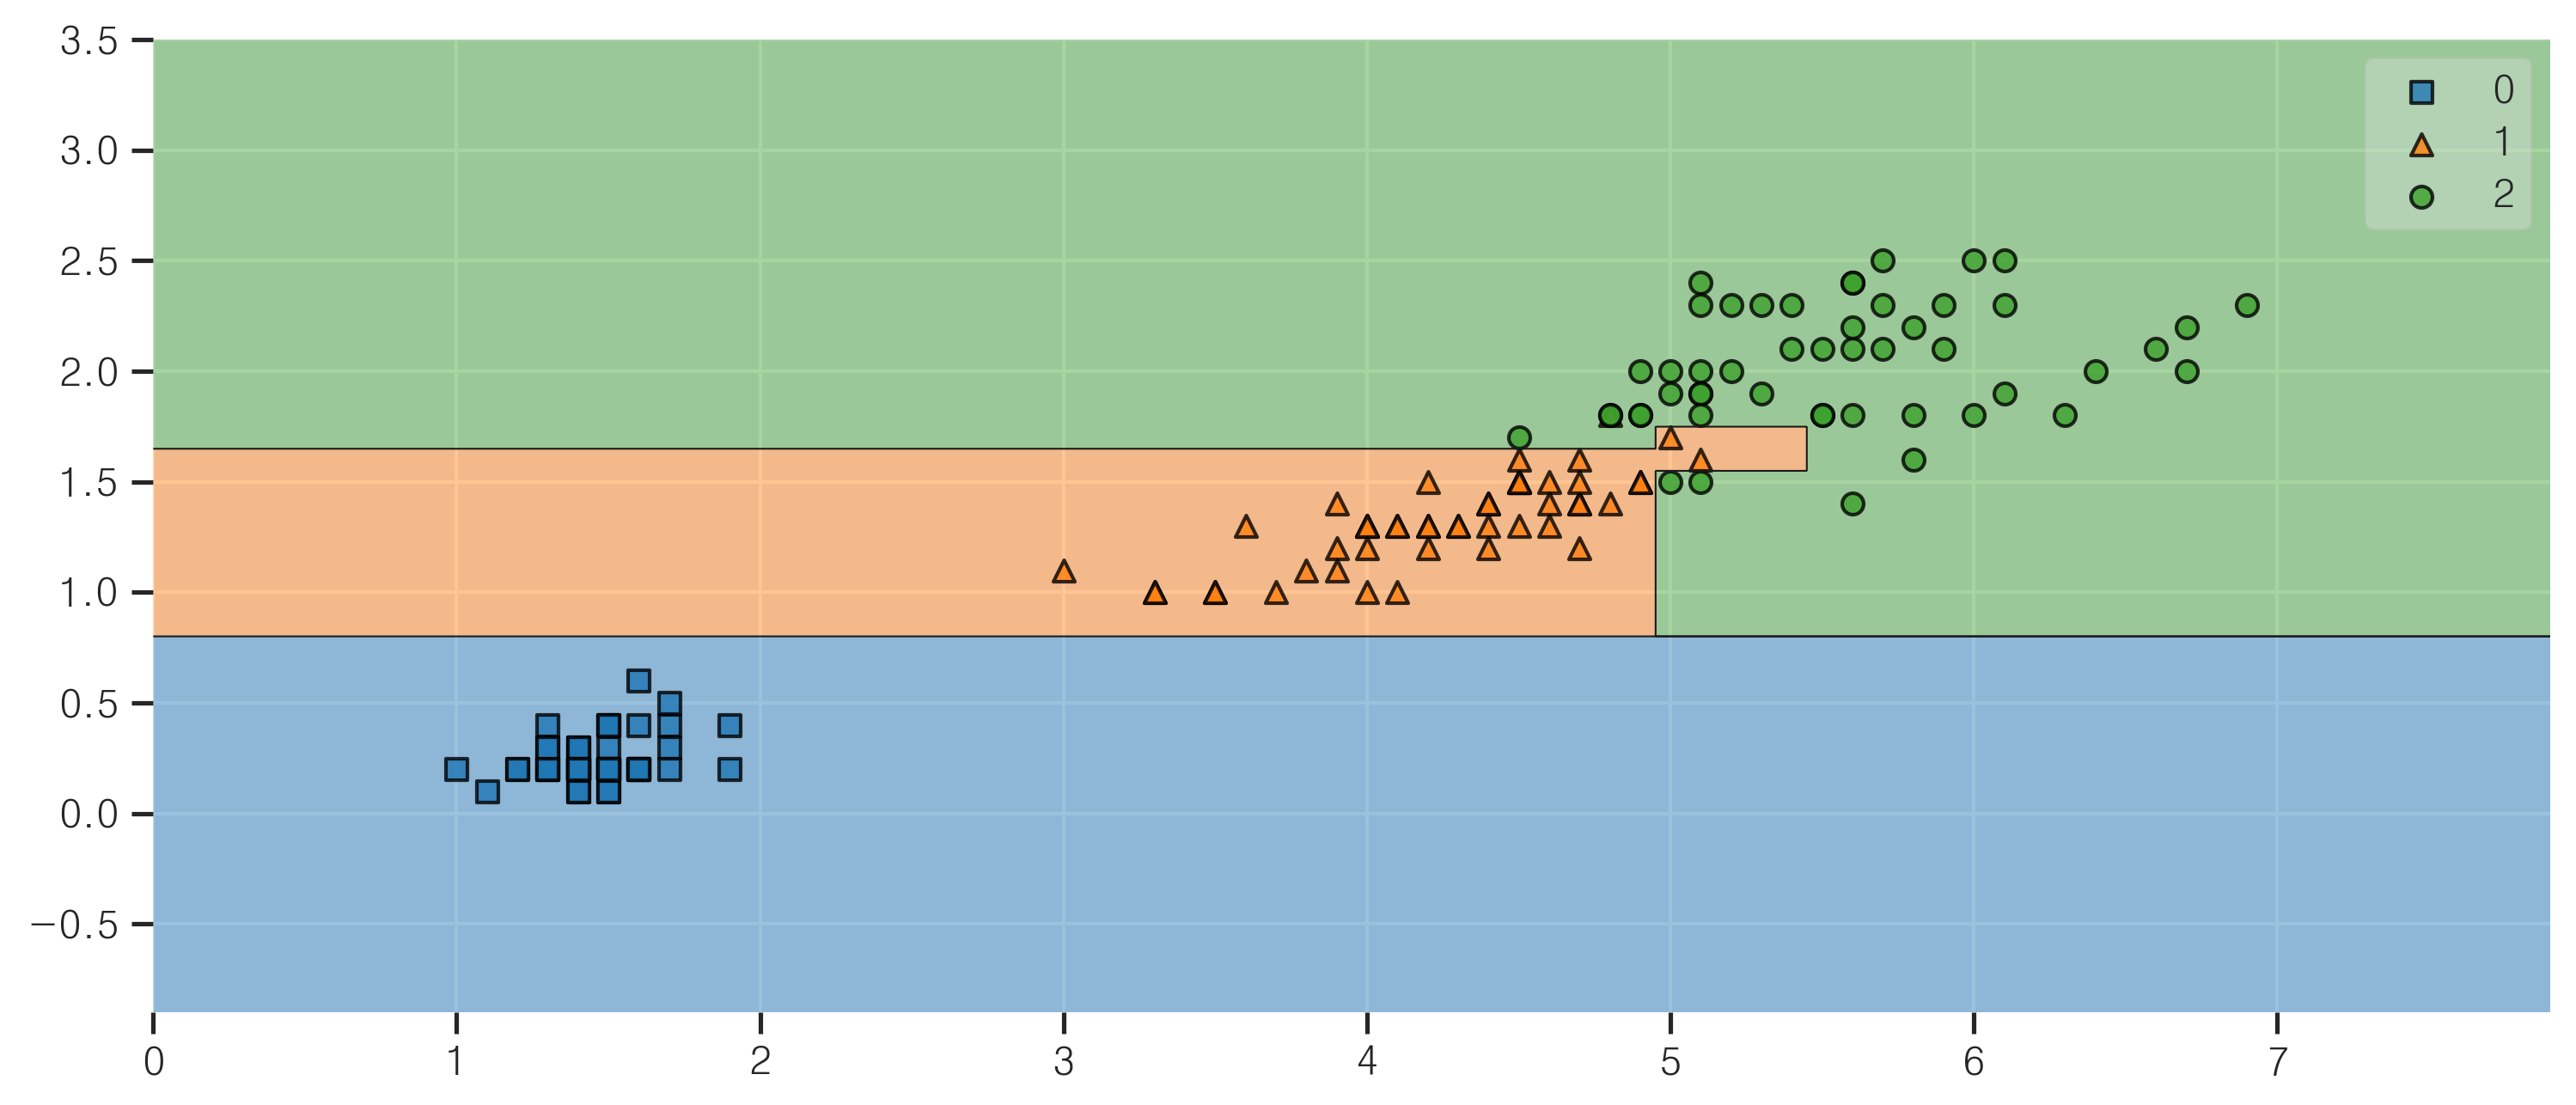

In [22]:
plt.figure(figsize=(12,5))
plot_decision_regions(X=iris.data[:,2:],y=iris.target,clf=iris_tree)
plt.show()

복잡한 경계면을 가지고 있는것을 확인 -> 과최적화의 위험! -> 다시 분류해야한다.

train-test set 분류

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
features=iris.data[:,2:]
labels=iris.target
X_train,X_test,y_train,y_test=train_test_split(features, labels, test_size=0.2, random_state=27, stratify=labels)

In [25]:
#stratify=labels : labels에 따라 층화추출 
np.unique(y_test,return_counts=True)

(array([0, 1, 2]), array([10, 10, 10], dtype=int64))

In [26]:
iris_tree=DecisionTreeClassifier(max_depth=2,random_state=27)
iris_tree.fit(X=X_train,y=y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=27, splitter='best')

train

In [27]:
#accuracy
y_pred_tr=iris_tree.predict(X_train)
accuracy_score(y_pred_tr,y_train)

0.975

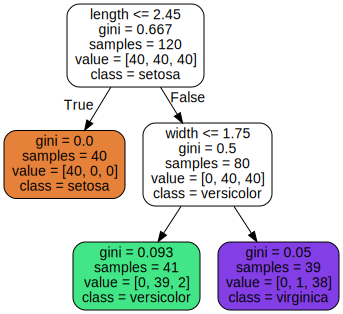

In [28]:
#graphviz
Source(export_graphviz(iris_tree,class_names=iris.target_names,feature_names=['length','width'], rounded=True, filled=True))

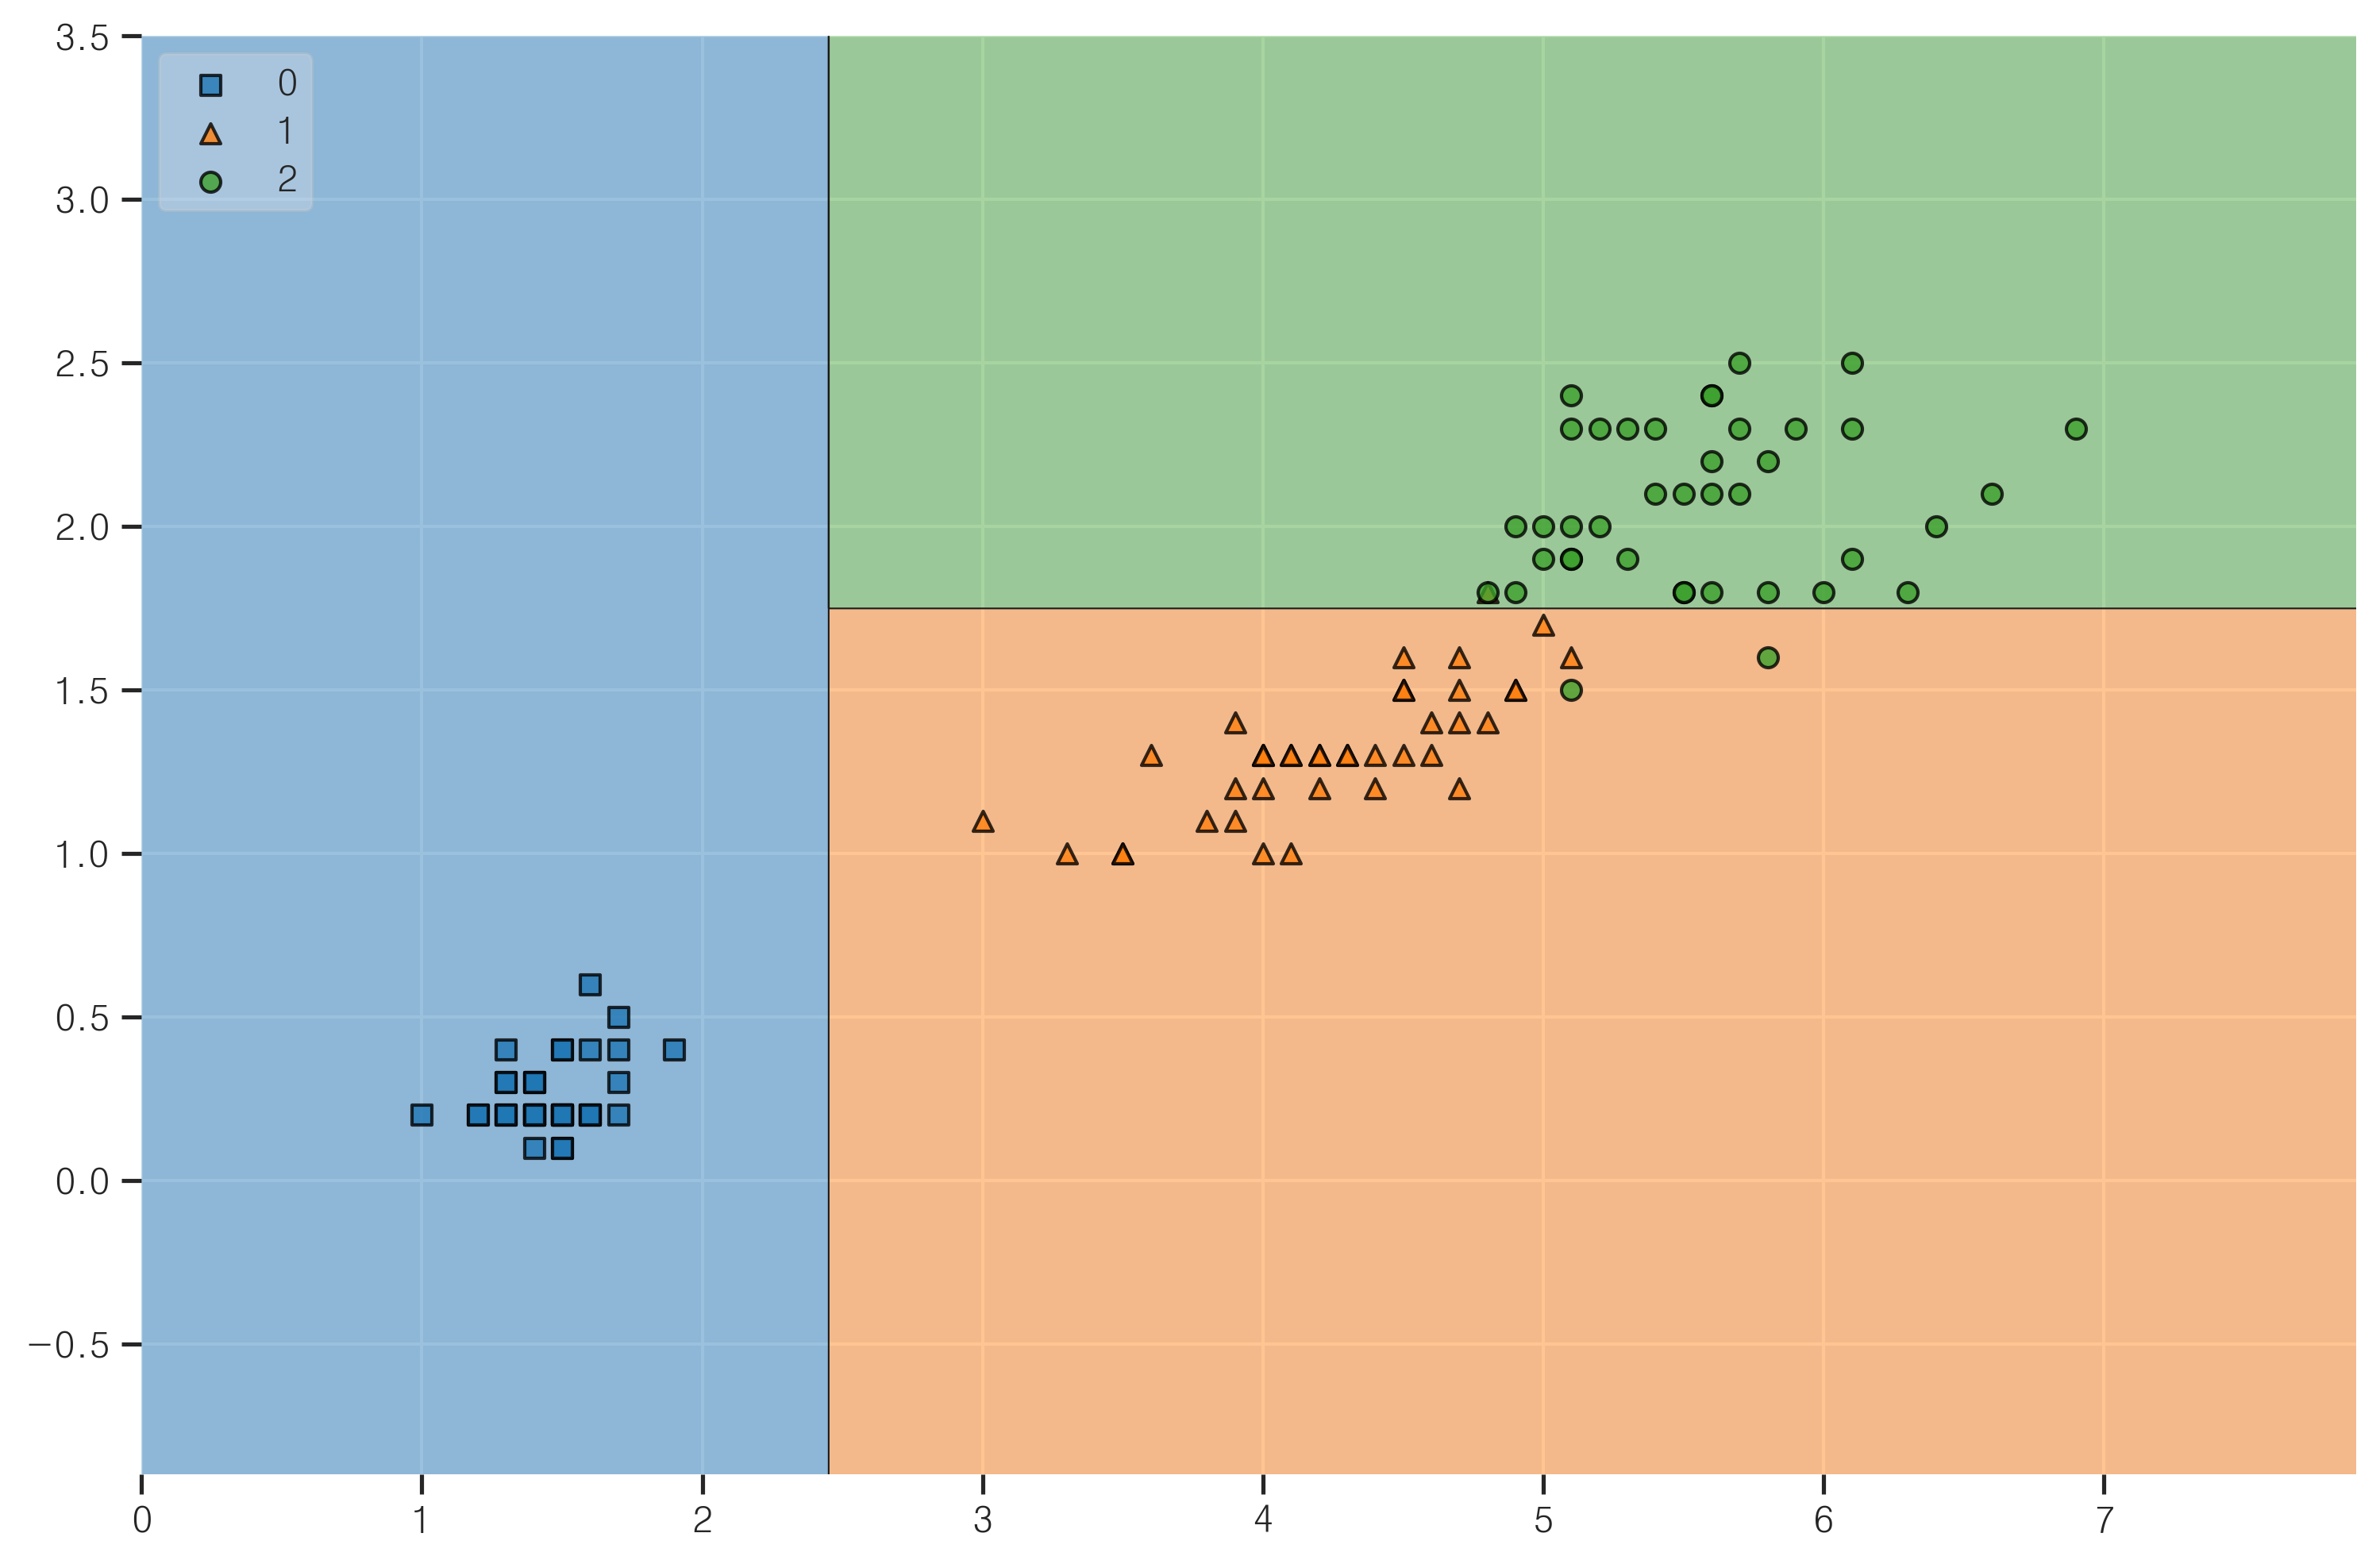

In [29]:
#mlxtend
plt.figure(figsize=(12,8))
plot_decision_regions(X=X_train,y=y_train,clf=iris_tree,legend=2)
plt.show()

test

In [30]:
#accuracy
y_pred_test=iris_tree.predict(X_test)
accuracy_score(y_pred_test,y_test)

0.9

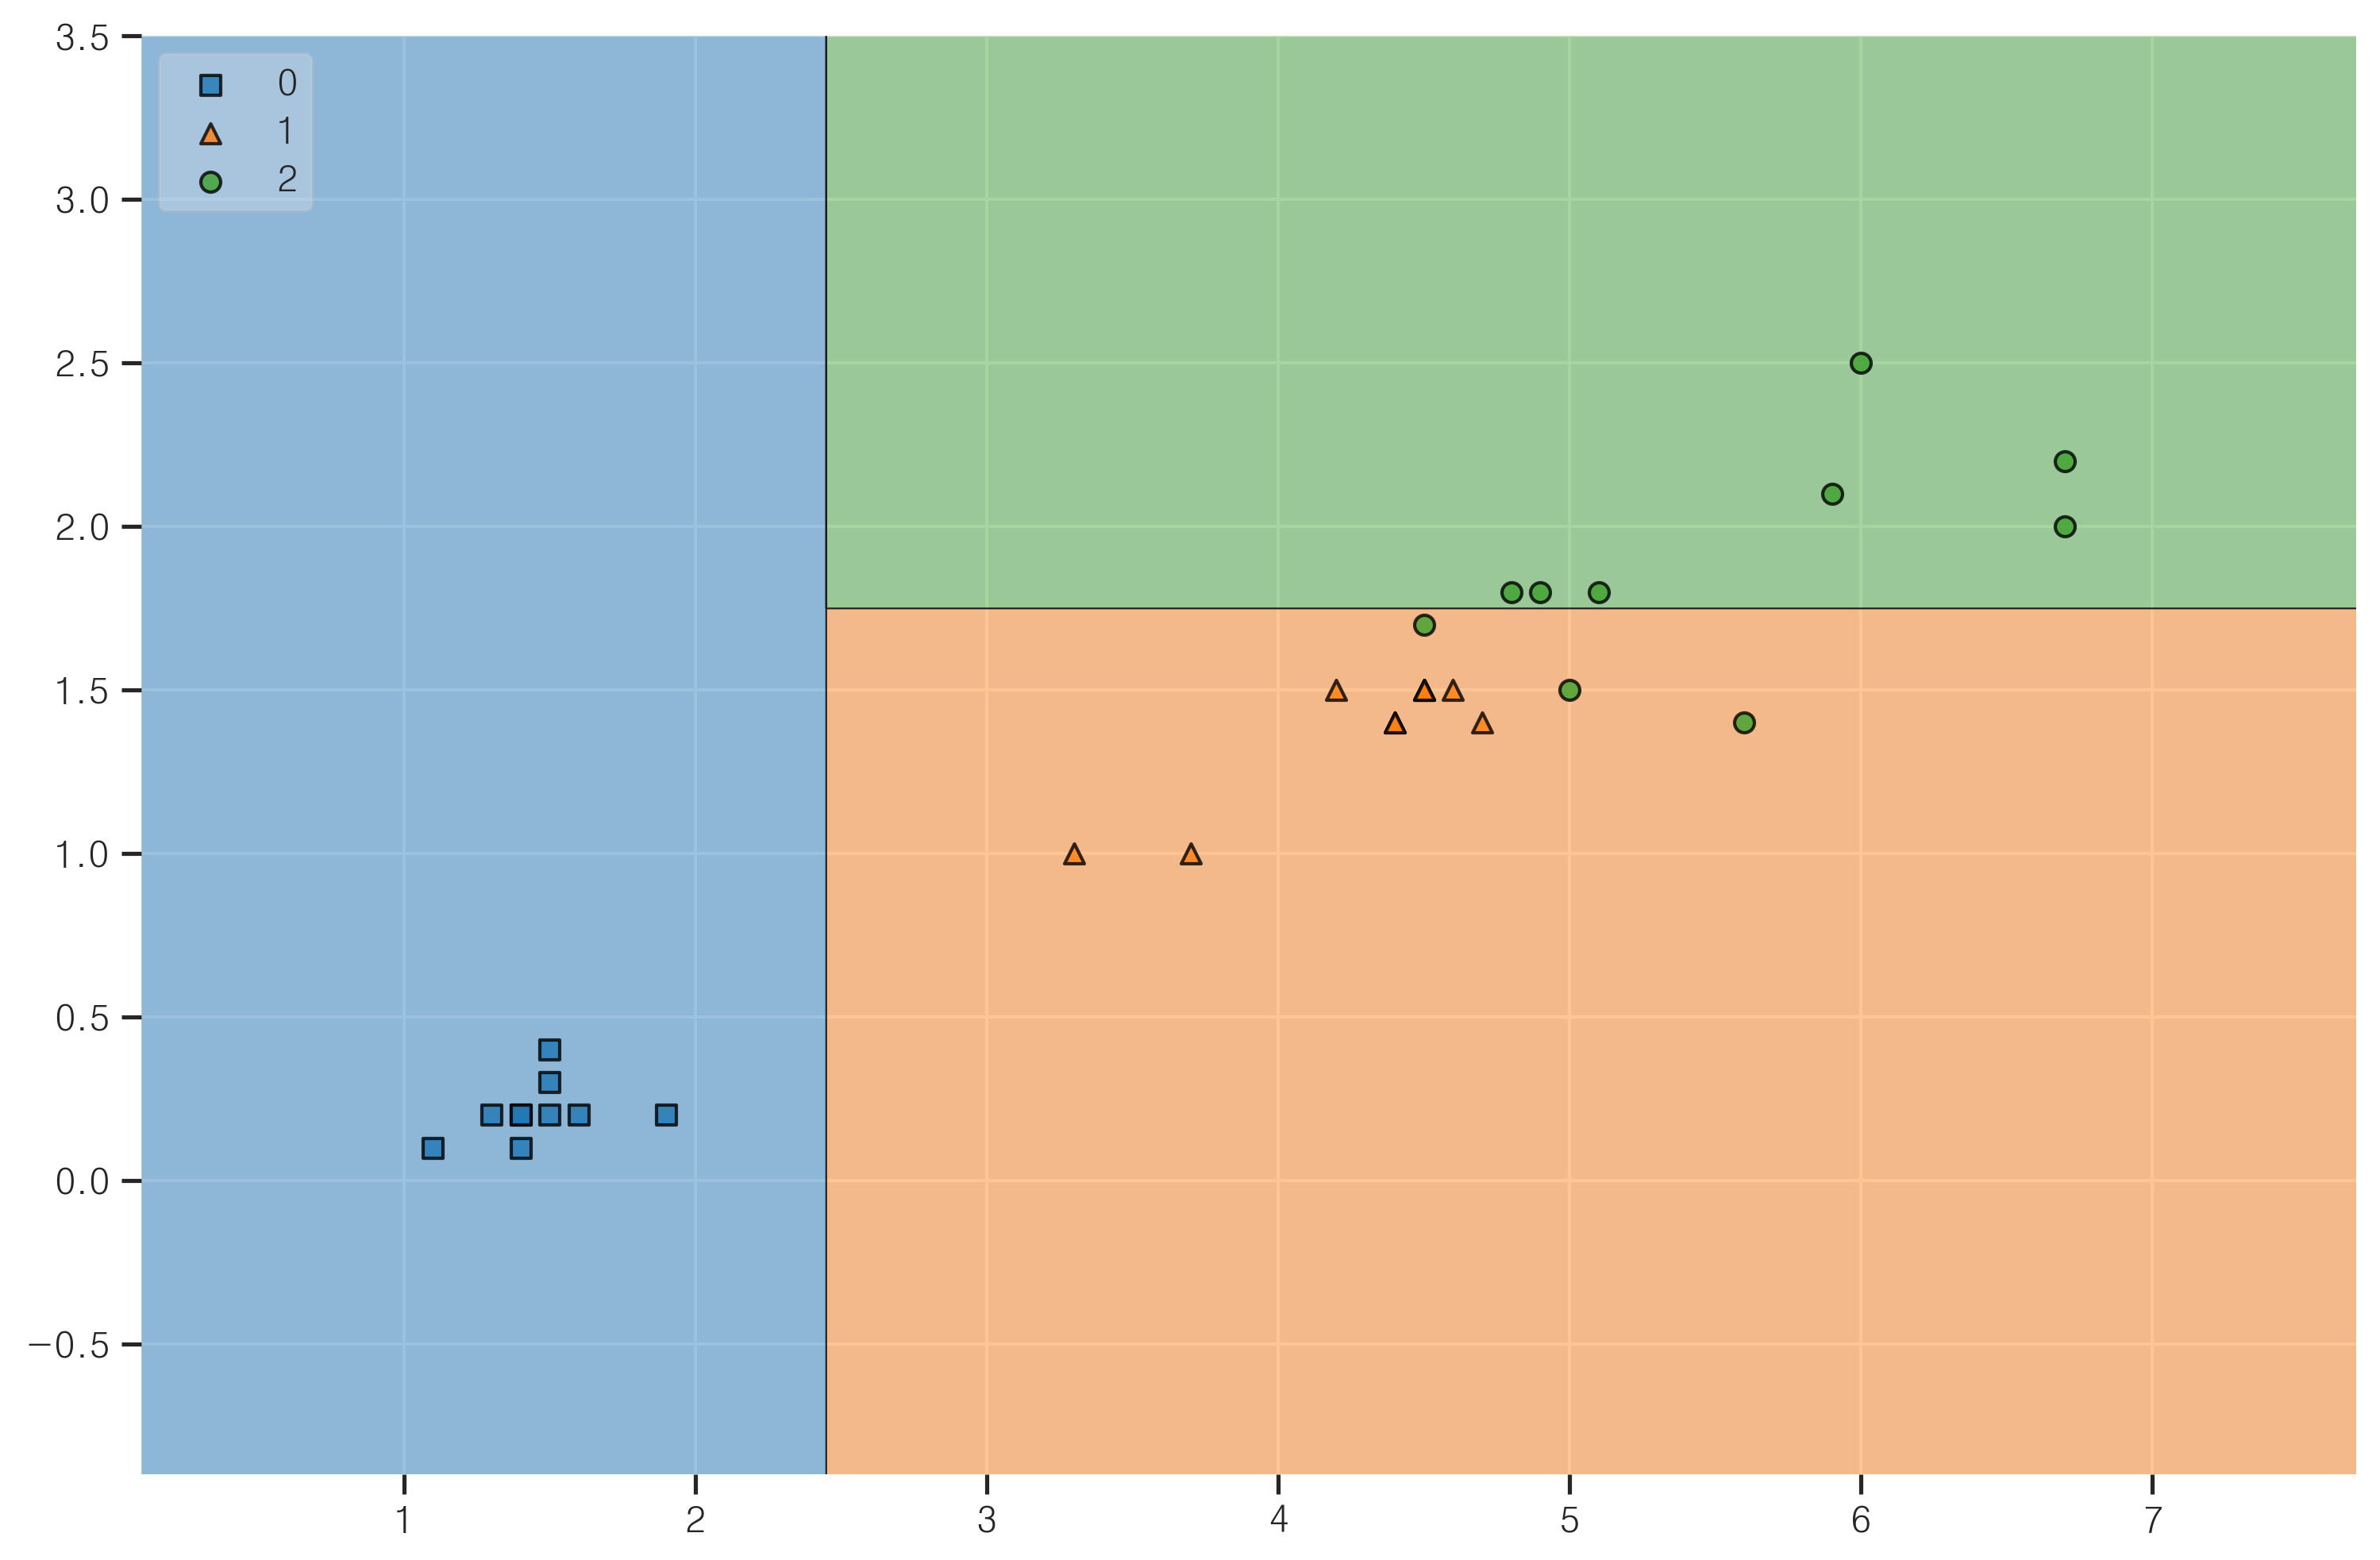

In [31]:
#mlxtend
plt.figure(figsize=(12,8))
plot_decision_regions(X=X_test,y=y_test,clf=iris_tree,legend=2)
plt.show()

train,test의 결정경계를 한번에 표시하기

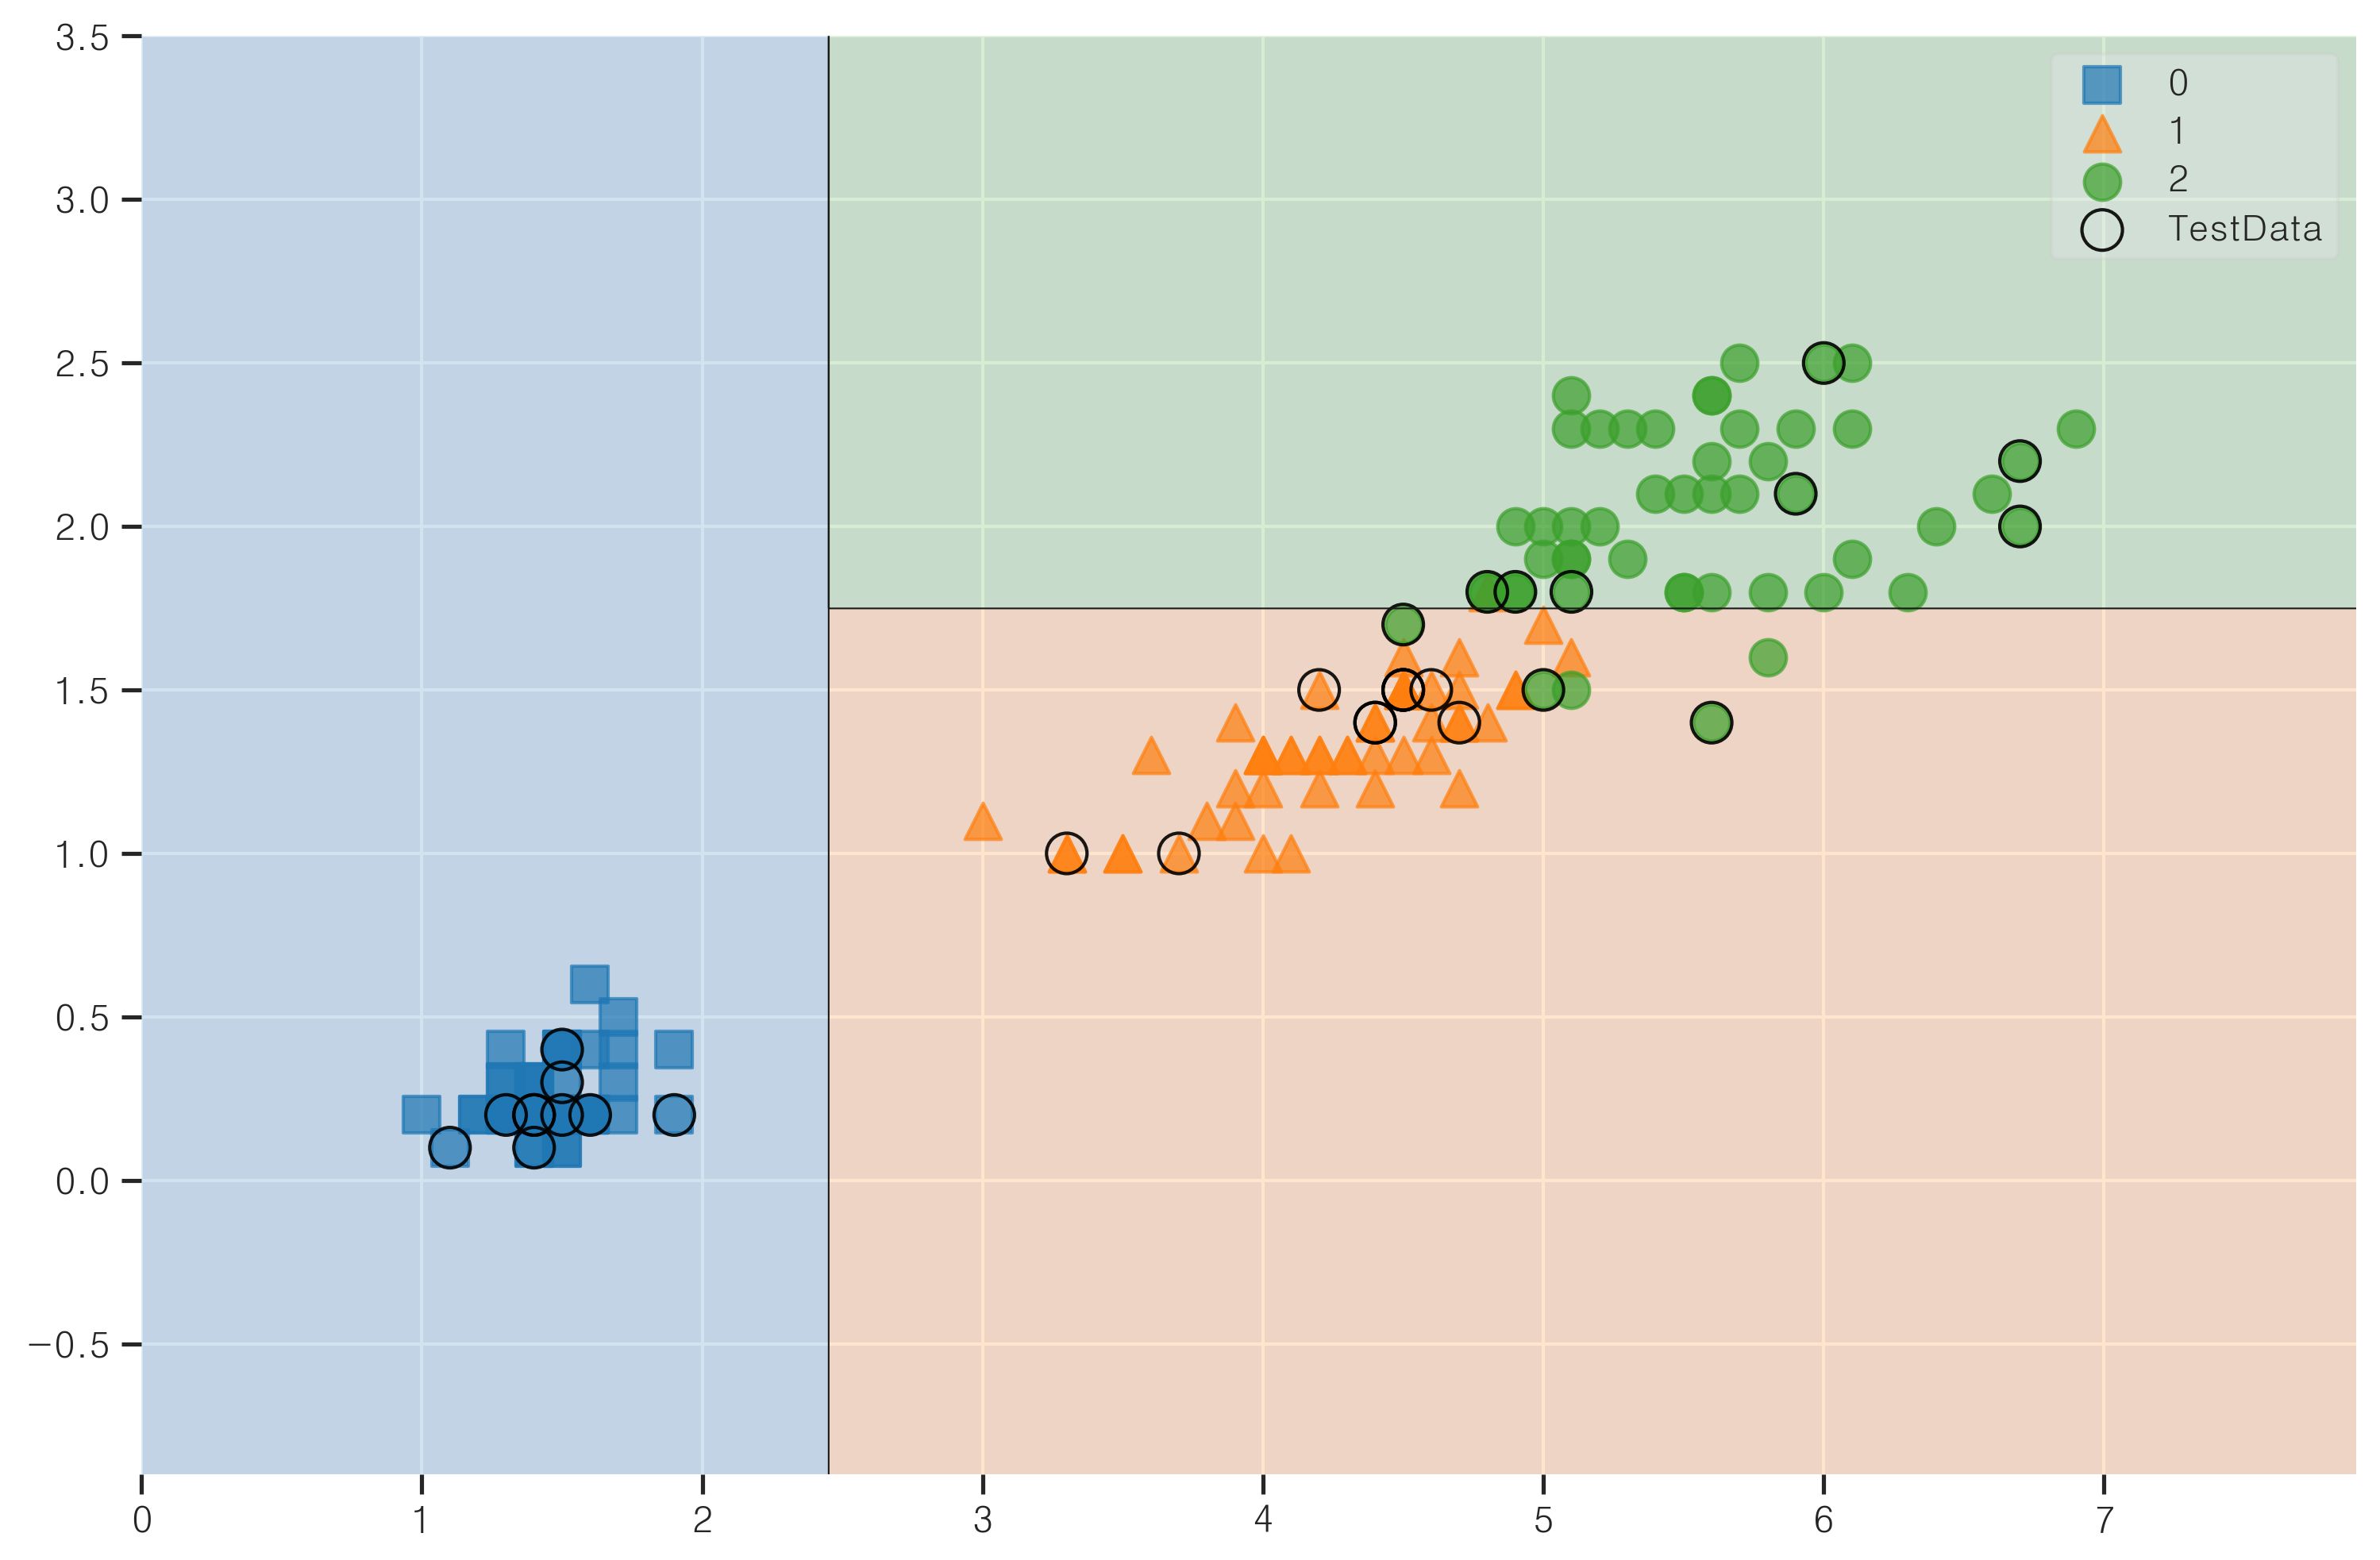

In [32]:
scatter_kwargs={'s': 120,'alpha': 0.7,'edgecolor': None}
scatter_highlight_kwargs= {'s':150,'alpha': 0.9,'label':'TestData'}

plt.figure(figsize=(12,8))
plot_decision_regions(X=features,y=labels,clf=iris_tree,X_highlight=X_test,scatter_kwargs=scatter_kwargs,\
                        contourf_kwargs={'alpha' : 0.2}, scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.show()

변수 4개(petal,sepal의 legnth,width) 모두 사용하기

In [33]:
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2,random_state=27,stratify=iris.target)
iris_tree=DecisionTreeClassifier(max_depth=2,random_state=27)
iris_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=27, splitter='best')

In [34]:
#accuracy
y_pred_tr=iris_tree.predict(X_train)
y_pred_test=iris_tree.predict(X_test)
print(accuracy_score(y_pred_tr,y_train))
print(accuracy_score(y_pred_test,y_test))

0.975
0.9


In [35]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

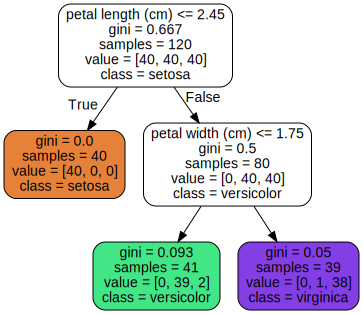

In [36]:
#graphiz
Source(export_graphviz(iris_tree,feature_names=iris.feature_names, class_names=iris.target_names, rounded=True, filled=True))

모델 사용하기

In [37]:
dict(zip(iris.feature_names,iris_tree.feature_importances_))

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.0,
 'petal length (cm)': 0.5387466307277629,
 'petal width (cm)': 0.46125336927223715}

In [38]:
data=[[7,3.,4.5,1.0]]
iris_tree.predict_proba(data)

array([[0.        , 0.95121951, 0.04878049]])

In [39]:
dict(zip(iris.target_names,iris_tree.predict_proba(data)[0]))

{'setosa': 0.0,
 'versicolor': 0.9512195121951219,
 'virginica': 0.04878048780487805}

In [40]:
iris.target_names[iris_tree.predict(data)]

array(['versicolor'], dtype='<U10')